In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
import ast
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
title_fontsize = 15

In [29]:
tweets = pd.read_csv('./data/large_datafiles/all_tweets_2015_2022.csv', 
                     parse_dates=['Date'], index_col=['Unnamed: 0'])

In [6]:
tweets['Lemmatized_tokens'] = tweets['Lemmatized_tokens'].apply(lambda x: ast.literal_eval(x))
tweets.to_csv('./data/tweets_cleaned_tokenized_words.csv')

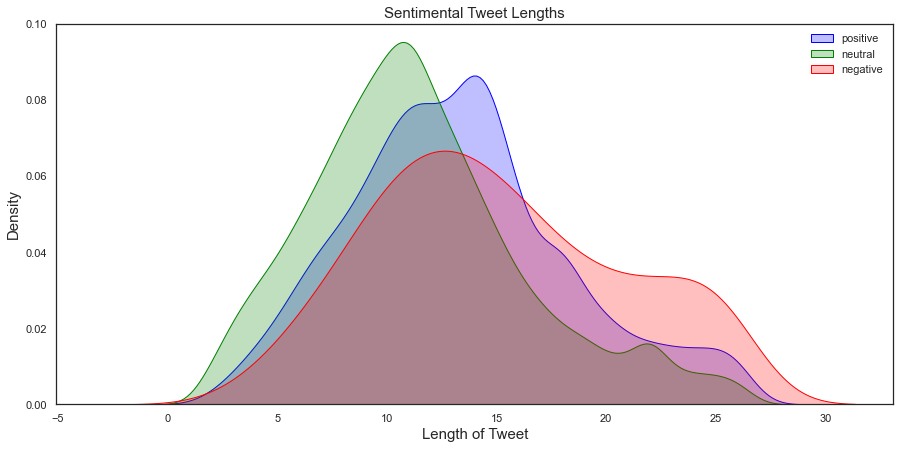

In [113]:
labels = ['positive', 'neutral', 'negative']
colors = ['blue', 'green', 'red']

for label, color in zip(labels, colors):
    data = tweets[tweets['label'] == label]
    sns.kdeplot(data['word_length'], shade=True, label=label, color=color, bw_adjust=3)

plt.xlabel('Length of Tweet', fontsize=title_fontsize)
plt.ylabel('Density', fontsize=title_fontsize)
plt.title('Sentimental Tweet Lengths', fontsize=title_fontsize)

plt.legend(labels, frameon=False)
plt.savefig('./visualization/Sentimental_Tweet_Lengths.png', dpi = 600)
plt.show()

In [238]:
lemmatized_tokens = list(tweets['Lemmatized_tokens'])
tokens_list = list(itertools.chain(*lemmatized_tokens))
counts = collections.Counter(tokens_list)
clean_tweets = pd.DataFrame(counts.most_common(21),
                           columns = ['words', 'counts'])

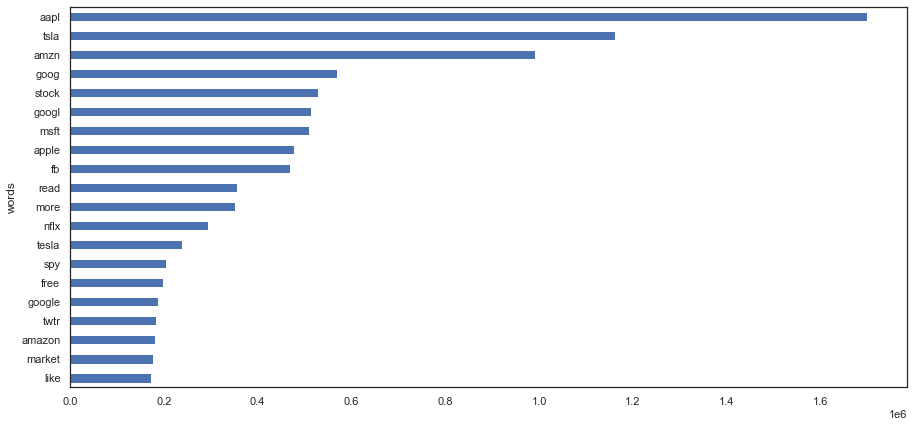

In [182]:
clean_tweets.drop(4).sort_values('counts').plot.barh(x='words', y='counts', legend=False)
plt.savefig('./visualization/20 most common words.png', dpi = 600)

In [20]:
# df = pd.read_csv('./data/balanced_tokenized_cleaned_stocktwits.csv')

In [36]:
cleaned_df = pd.read_csv('./data/word_cloud_df.csv', index_col=None)

In [41]:
from io import BytesIO
import base64

In [203]:
img1.getvalue()

b''

In [206]:
def create_wordcloud(company):
    
    # filter by company
    df_comp = cleaned_df[cleaned_df['company'] == company]
    # filter by sentiments
    df_comp_bull = df_comp[df_comp['sentiment'] == 1]
    df_comp_bear = df_comp[df_comp['sentiment'] == 0] 
    text_bull = ' '.join(i for i in df_comp_bull['body'])
    text_bear = ' '.join(i for i in df_comp_bear['body'])
    
    # Load the two images and convert them to numpy arrays
    mask1 = np.array(Image.open('./logos/bull.png'))
    mask2 = np.array(Image.open('./logos/bear.png'))

    # Create the WordCloud objects with the masks
    wc1 = WordCloud(background_color='white', mask=mask1)
    wc2 = WordCloud(background_color='white', mask=mask2)

    # Generate the word clouds
    wc1.generate(text_bull)
    wc2.generate(text_bear)

    # Combine the two images side by side
    combined_width = mask1.shape[1] + mask2.shape[1]
    combined_height = max(mask1.shape[0], mask2.shape[0])

    combined_image = Image.new('RGB', (combined_width, combined_height), color='white')
    combined_image.paste(Image.fromarray(wc1.to_array()), (0, 0))
    combined_image.paste(Image.fromarray(wc2.to_array()), (mask1.shape[1], 0))

    # Save or display the combined image
    img = BytesIO()
    combined_image.save(img, format='png')
    
    return "data:image/png;base64,{}".format(base64.b64encode(img.getvalue()).decode())

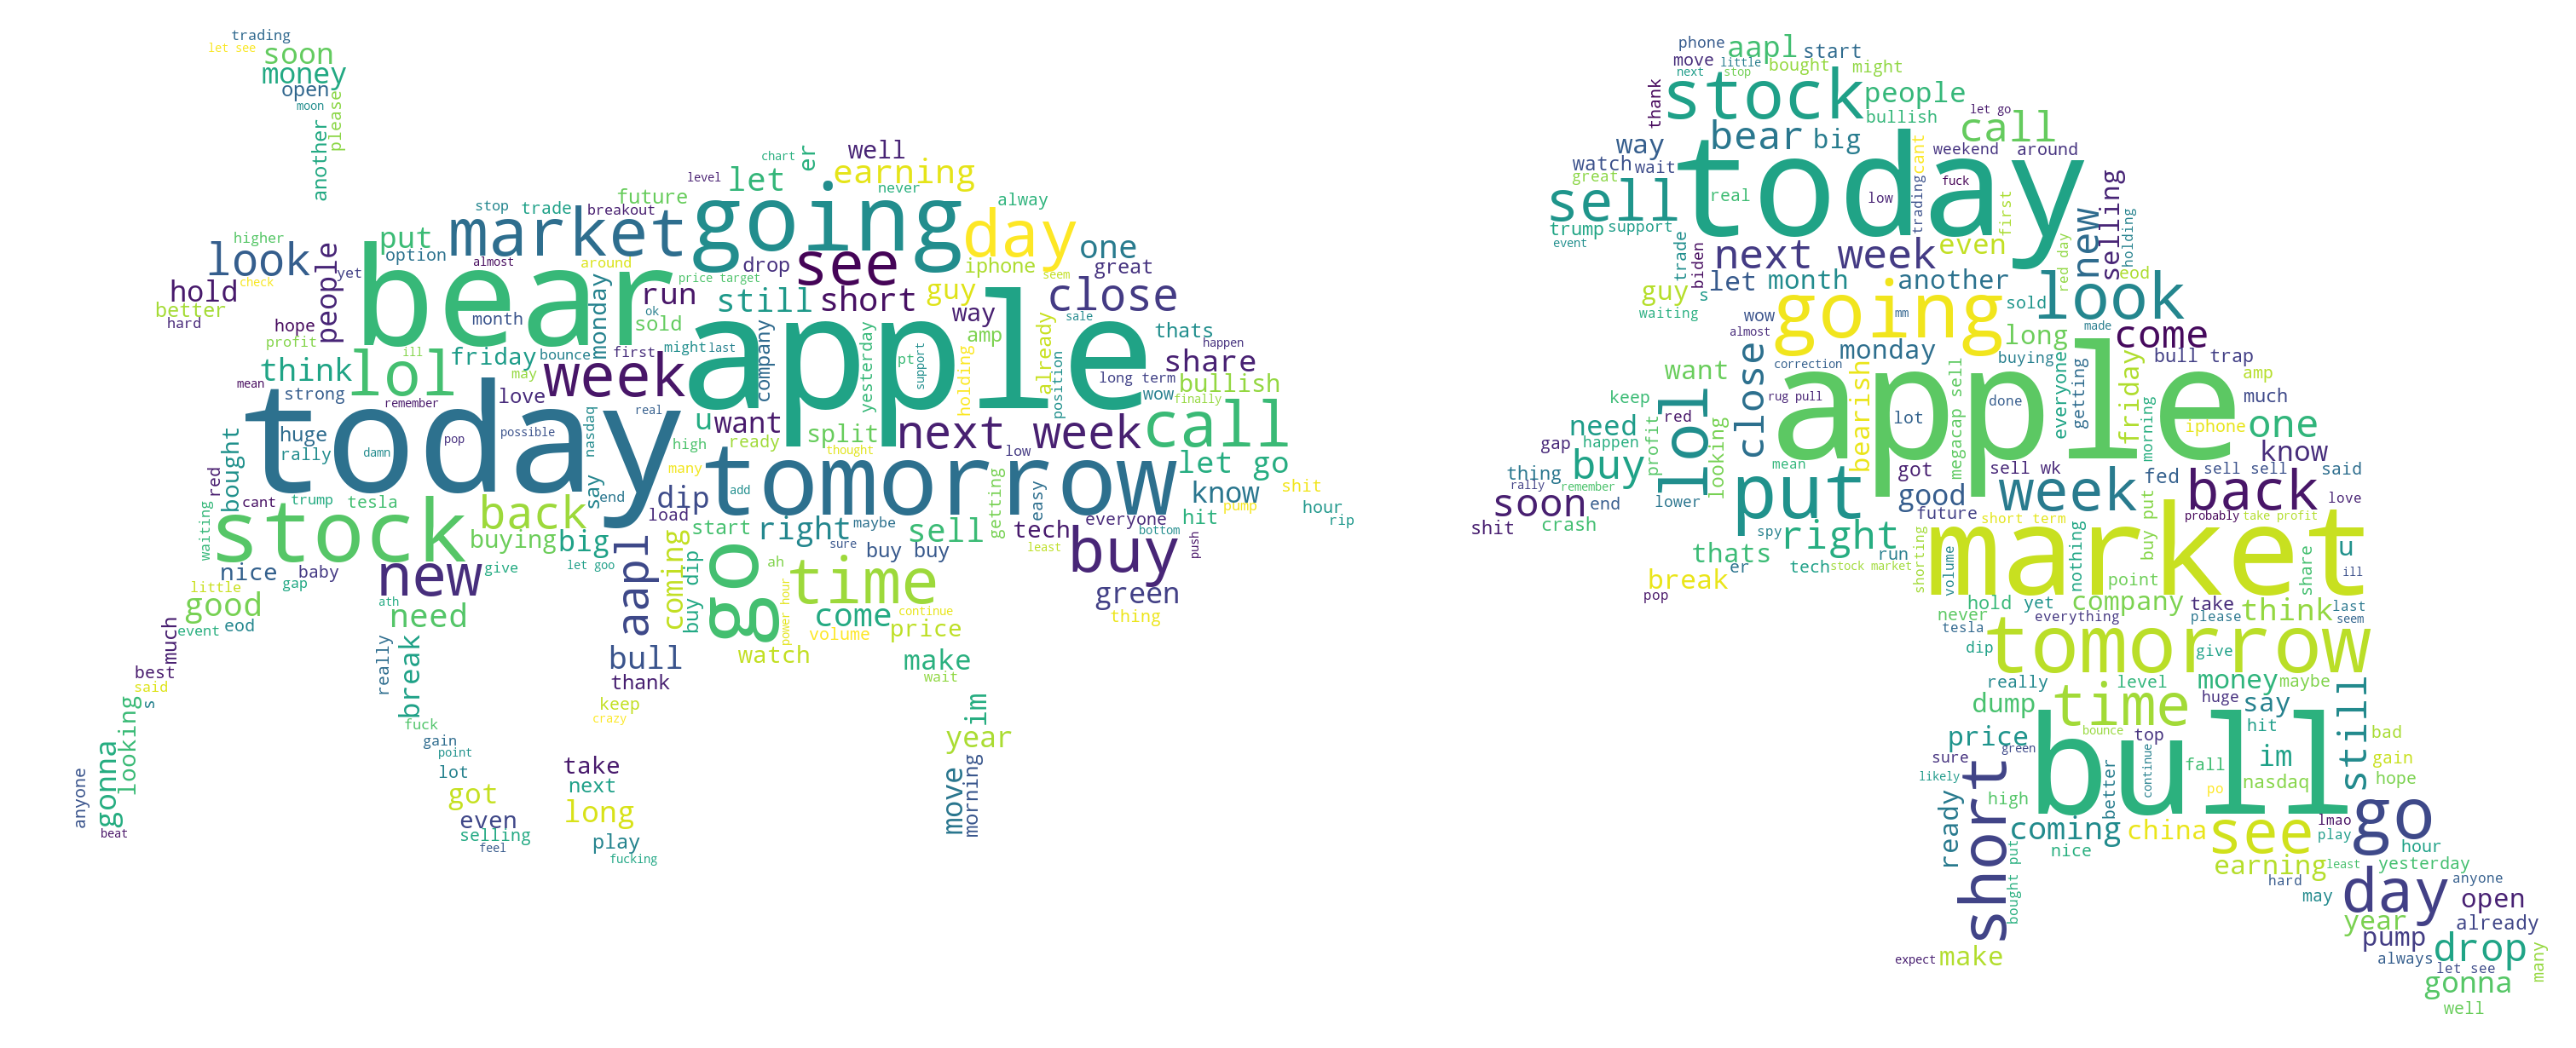

In [208]:
combined_image

''
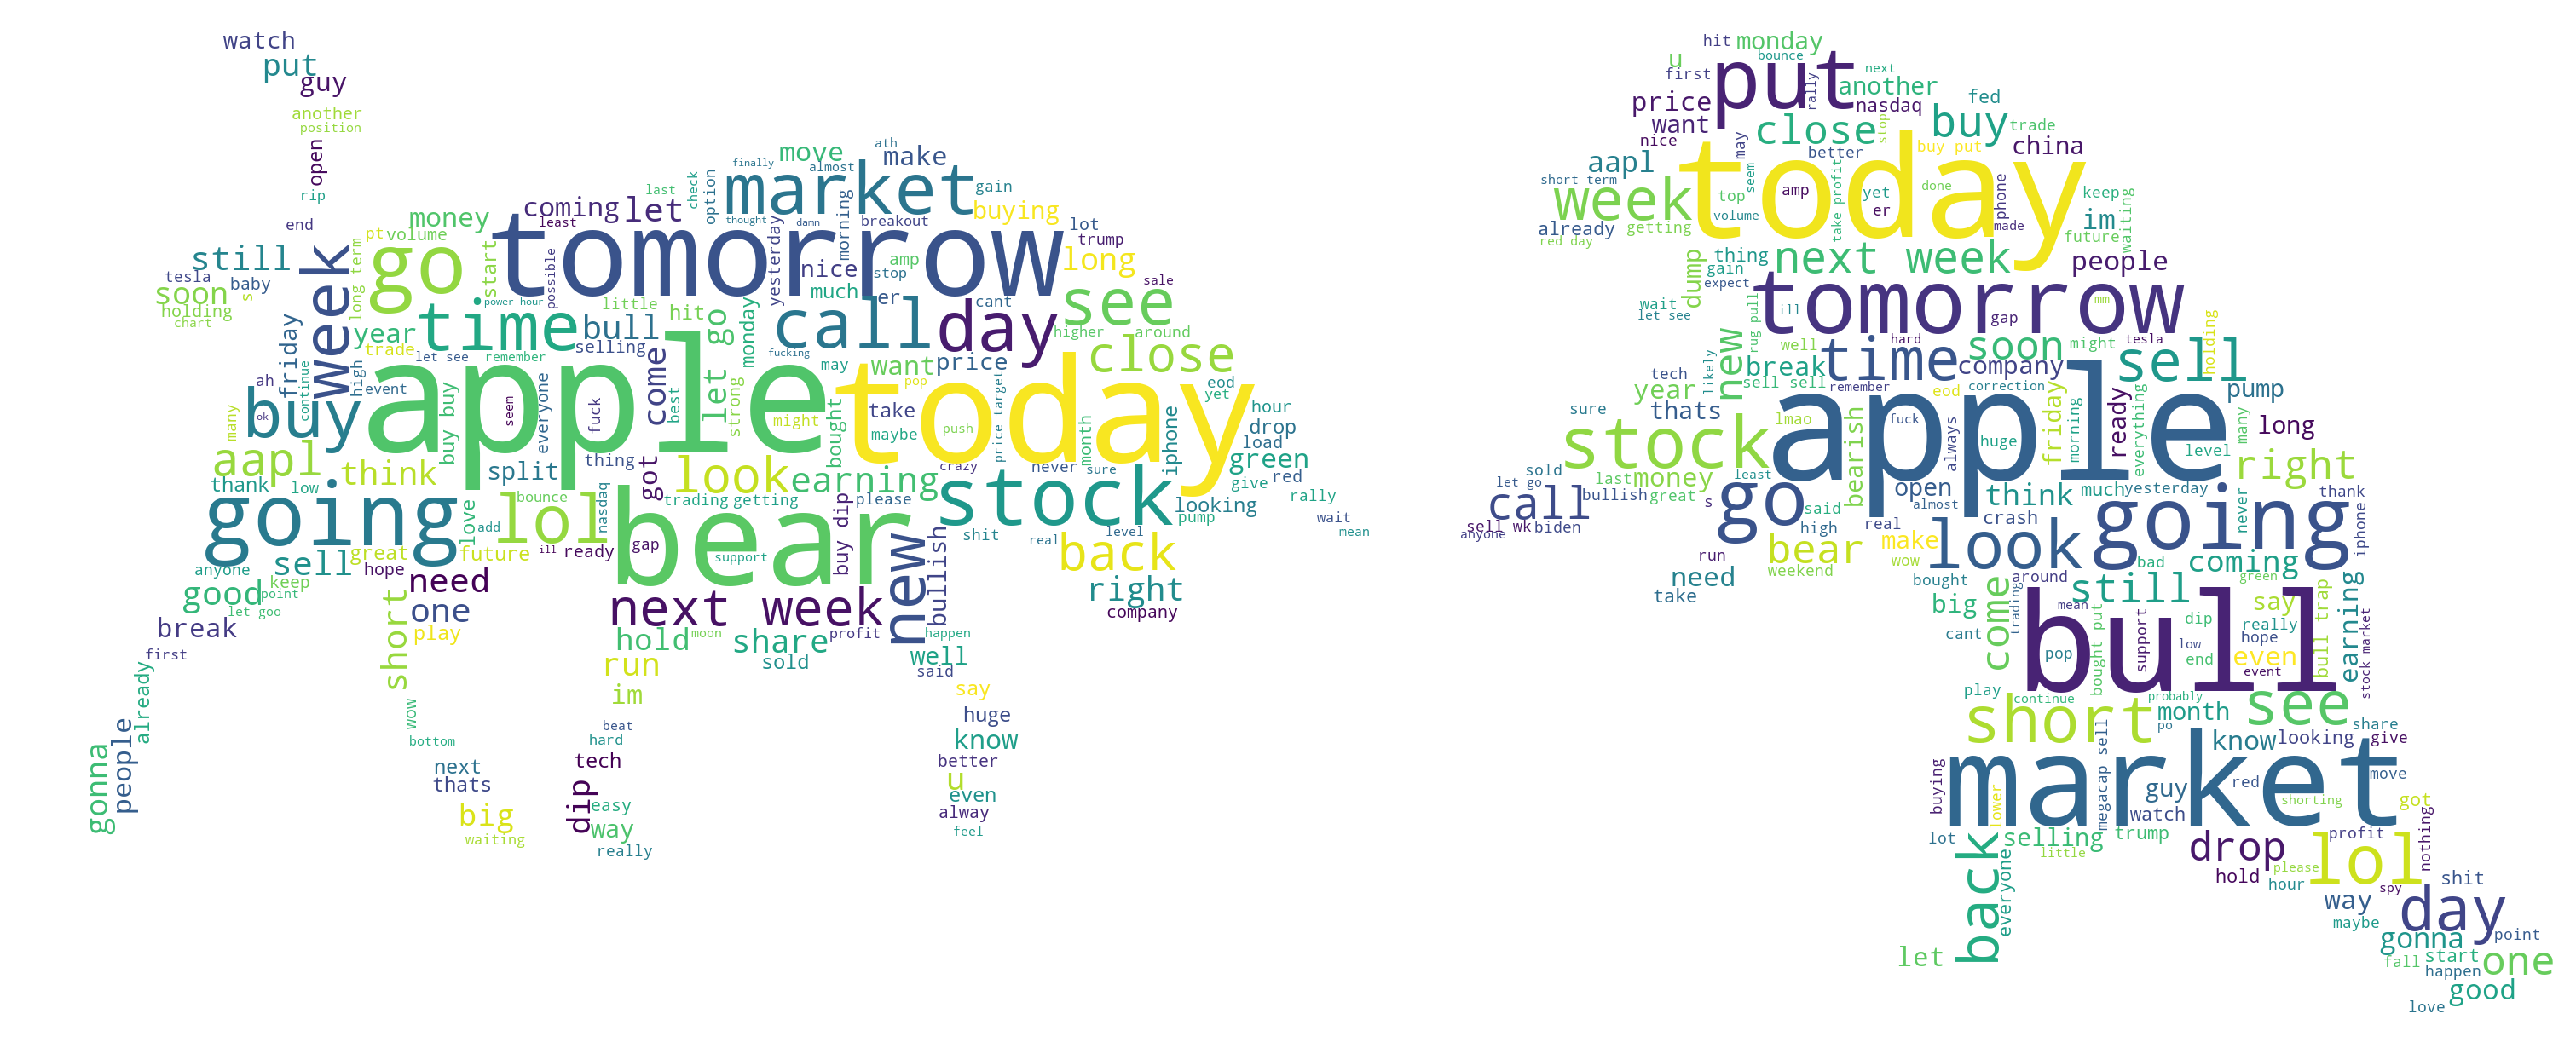

In [207]:
create_wordcloud('AAPL')

In [193]:
mask = np.array(Image.open(f"./logos/bull_mask.png"))
wc = create_wordcloud('AAPL')
create_wordcloud('TSLA')